19/19 ━━━━━━━━━━━━━━━━━━━━ 26s 1s/step


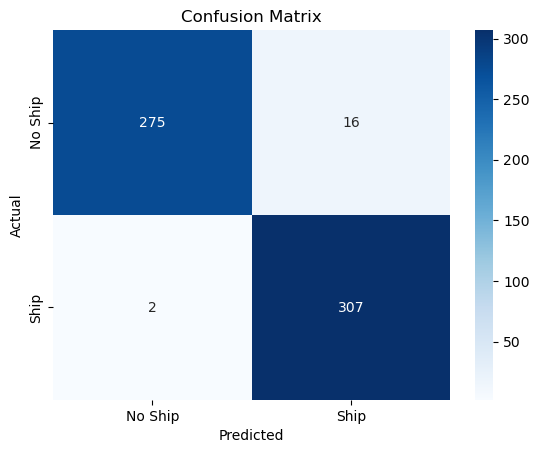

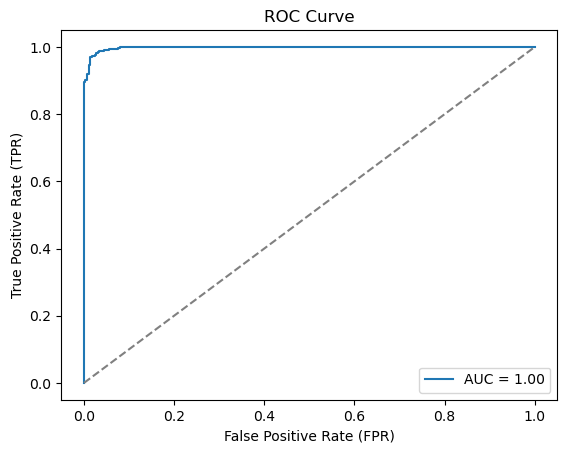

Precision: 0.9505
Recall: 0.9935
F1 Score: 0.9715
Average Precision: 0.9981
              precision    recall  f1-score   support

     No Ship       0.99      0.95      0.97       291
        Ship       0.95      0.99      0.97       309

    accuracy                           0.97       600
   macro avg       0.97      0.97      0.97       600
weighted avg       0.97      0.97      0.97       600



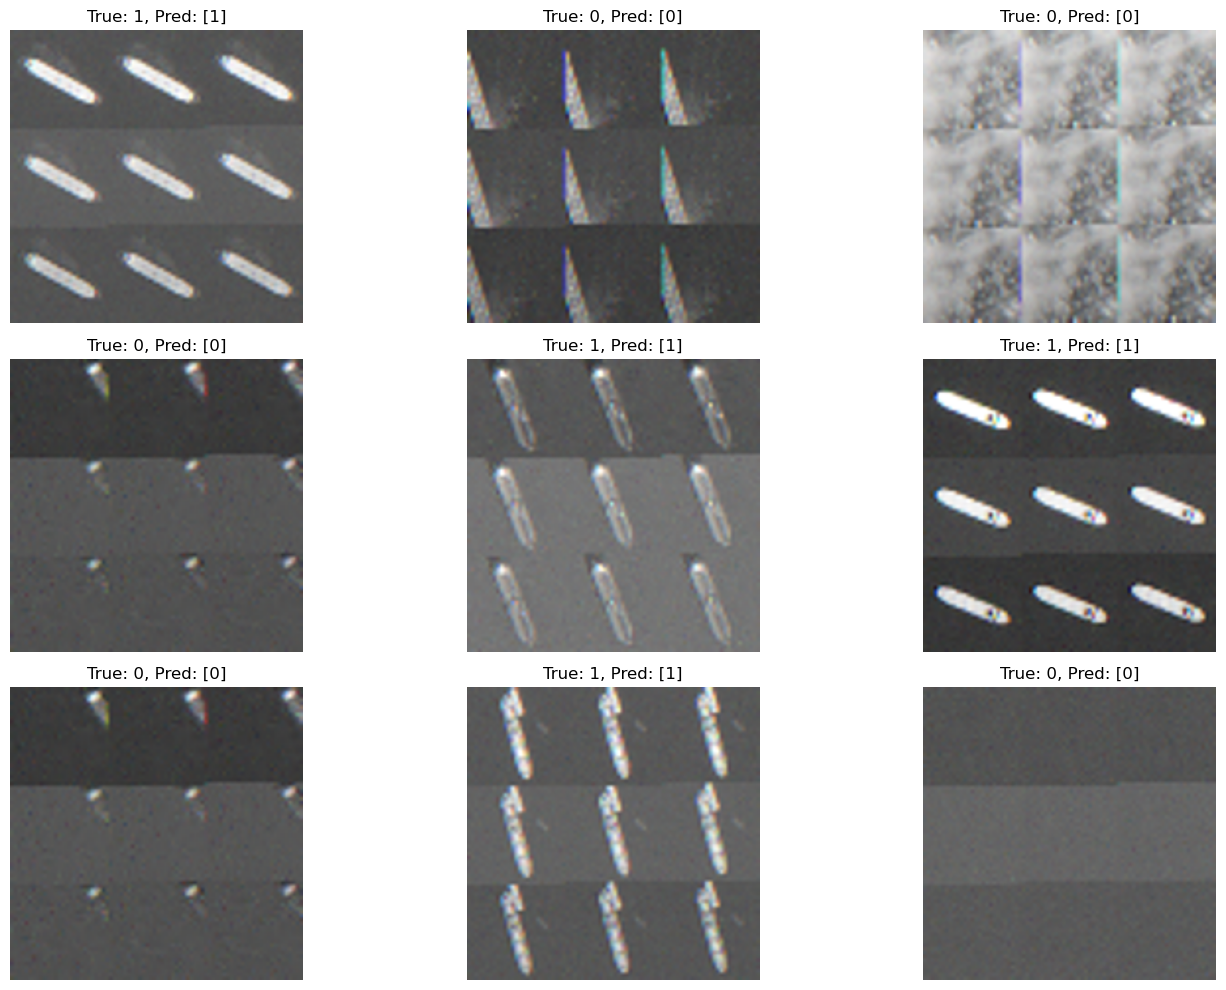


Dataset Analysis:
Total Test Samples: 600
Class Distribution (No Ship / Ship): [291 309]


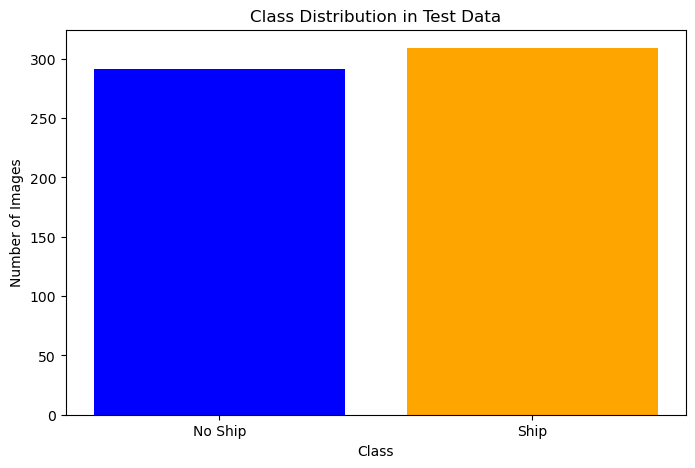

Imbalance Ratio (No Ship / Ship): 0.94


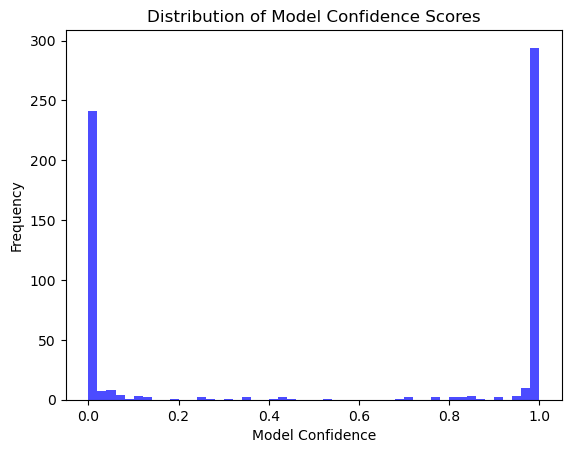


Number of Misclassified Samples: 179586
Visualizing Misclassified Samples:


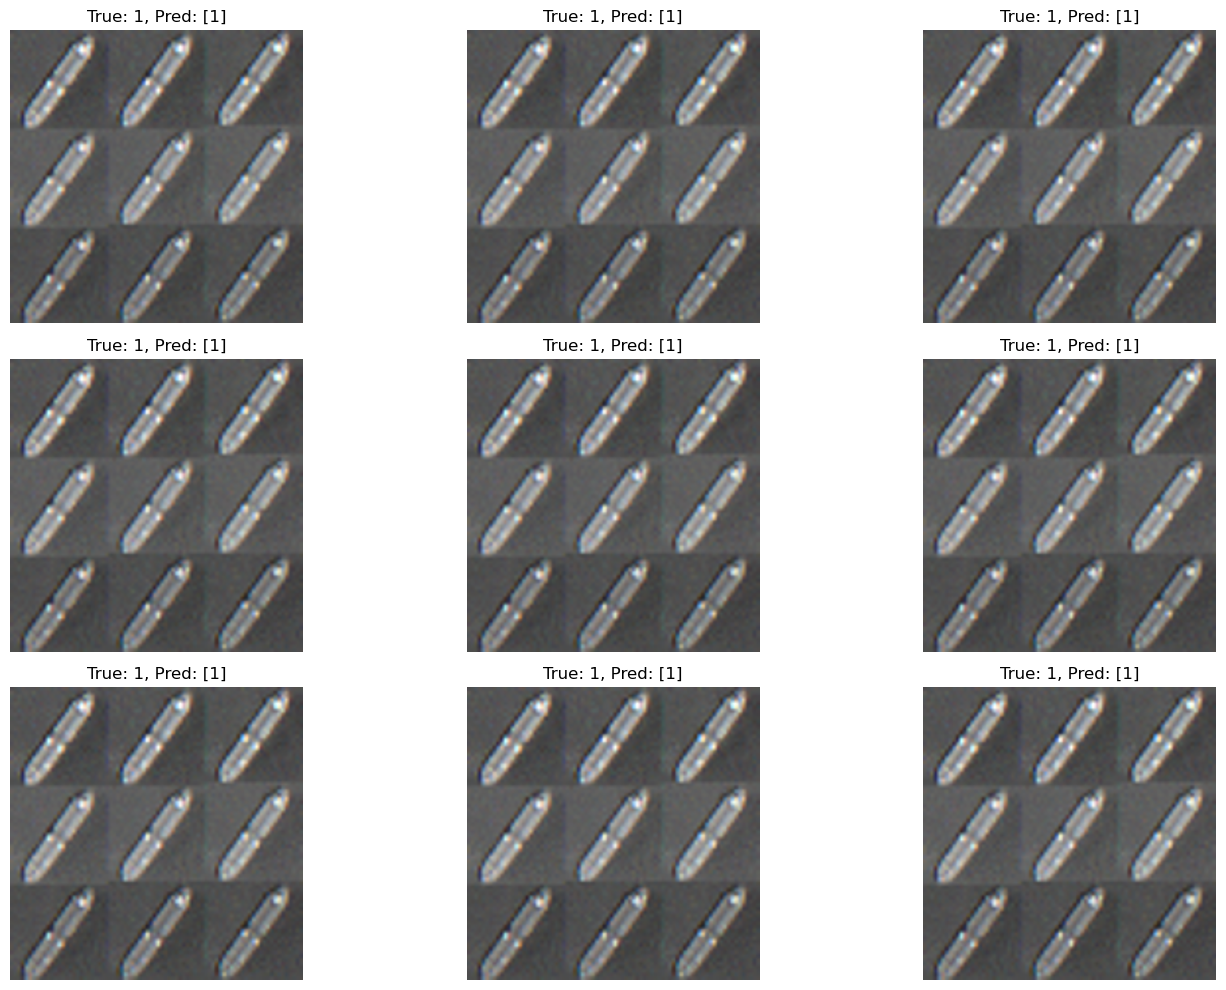

In [3]:
import numpy as np
import tensorflow as tf
from sklearn.metrics import confusion_matrix, roc_curve, roc_auc_score, precision_score, recall_score, f1_score, average_precision_score, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

# Load preprocessed data
X_test = np.load("data/X_test.npy")
y_test = np.load("data/y_test.npy")

# Load the saved model
model = tf.keras.models.load_model("ship_classifier_augmented.h5")

# Get predictions
y_pred = model.predict(X_test)
y_pred_binary = (y_pred > 0.5).astype(int)  # Convert probabilities to binary (0 or 1)

# 1. Confusion Matrix
cm = confusion_matrix(y_test, y_pred_binary)
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["No Ship", "Ship"], yticklabels=["No Ship", "Ship"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

# 2. ROC Curve and AUC
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
auc = roc_auc_score(y_test, y_pred)
plt.plot(fpr, tpr, label=f"AUC = {auc:.2f}")
plt.plot([0, 1], [0, 1], linestyle="--", color="gray")  # Random guess line
plt.xlabel("False Positive Rate (FPR)")
plt.ylabel("True Positive Rate (TPR)")
plt.title("ROC Curve")
plt.legend()
plt.show()

# 3. Precision, Recall, F1 Score
precision = precision_score(y_test, y_pred_binary)
recall = recall_score(y_test, y_pred_binary)
f1 = f1_score(y_test, y_pred_binary)
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")

# 4. Average Precision (AP)
ap = average_precision_score(y_test, y_pred)
print(f"Average Precision: {ap:.4f}")

# 5. Classification Report
report = classification_report(y_test, y_pred_binary, target_names=["No Ship", "Ship"])
print(report)

# 6. Visualize Predictions
plt.figure(figsize=(15, 10))
for i in range(9):
    idx = np.random.randint(0, len(X_test) - 1)
    image = X_test[idx]
    true_label = y_test[idx]
    pred_label = y_pred_binary[idx]

    plt.subplot(3, 3, i + 1)
    plt.imshow(image)
    plt.title(f"True: {true_label}, Pred: {pred_label}")
    plt.axis("off")
plt.tight_layout()
plt.show()

# 7. Dataset Analysis
print("\nDataset Analysis:")
print(f"Total Test Samples: {len(X_test)}")
print(f"Class Distribution (No Ship / Ship): {np.bincount(y_test)}")

# Visualize class distribution
plt.figure(figsize=(8, 5))
plt.bar([0, 1], np.bincount(y_test), color=["blue", "orange"])
plt.xticks([0, 1], ["No Ship", "Ship"])
plt.xlabel("Class")
plt.ylabel("Number of Images")
plt.title("Class Distribution in Test Data")
plt.show()

# Calculate imbalance ratio
imbalance_ratio = np.bincount(y_test)[0] / np.bincount(y_test)[1]
print(f"Imbalance Ratio (No Ship / Ship): {imbalance_ratio:.2f}")

# 8. Model Confidence Analysis
confidence = np.max(y_pred, axis=1)  # Confidence scores
plt.hist(confidence, bins=50, alpha=0.7, color="blue")
plt.xlabel("Model Confidence")
plt.ylabel("Frequency")
plt.title("Distribution of Model Confidence Scores")
plt.show()

# 9. Misclassified Samples Analysis
misclassified_indices = np.where(y_pred_binary != y_test)[0]
print(f"\nNumber of Misclassified Samples: {len(misclassified_indices)}")
if len(misclassified_indices) > 0:
    print("Visualizing Misclassified Samples:")
    plt.figure(figsize=(15, 10))
    for i, idx in enumerate(misclassified_indices[:9]):  # Show up to 9 misclassified samples
        image = X_test[idx]
        true_label = y_test[idx]
        pred_label = y_pred_binary[idx]

        plt.subplot(3, 3, i + 1)
        plt.imshow(image)
        plt.title(f"True: {true_label}, Pred: {pred_label}")
        plt.axis("off")
    plt.tight_layout()
    plt.show()